In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
fooditems = pd.read_csv('https://raw.githubusercontent.com/syedayazsa/data/master/food_items.csv')

In [3]:
fooditems.head()
#sns.heatmap(fooditems.isnull())

,index,brand,categories,ingredients,manufacturer,title,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,0,Simon Fischer,"Grocery & Gourmet Food,Food,Grocery","Dried Prunes,Water,Corn Syrup,Sugar,Pectin.",Sokol And Company,Simon Fischer Fruit Bttr Prune Lekvar,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,McCormick,"Grocery & Gourmet Food,Food,Grocery","Salt,Sugar,Molasses (Refinery Syrup, Molasses,...","McCormick & Co, Inc",McCORMICK GRILL MATES MOLASSES BACON SEASONING...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Jolly Time,"Grocery & Gourmet Food,Grocery","Salt, Yellow 5 Lake, Tricalcium Phosphate And ...",Reese's,Jolly Time Popcorn,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Ziyad,"Grocery & Gourmet Food,grocery",Mechanically hulled seasame seeds.Allergy Info...,Ziyad,Ziyad Tahini Sesame Sauce,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Fla-Vor-Ice,"Grocery & Gourmet Food,grocery",FALSE,Fla-Vor-Ice,Fla-Vor-Ice Plus Giant Pops,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
fooditems.columns

Index(['index', 'brand', 'categories', 'ingredients', 'manufacturer', 'title',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29'],
      dtype='object')

In [5]:
fooditems.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29'], axis = 1, inplace = True)

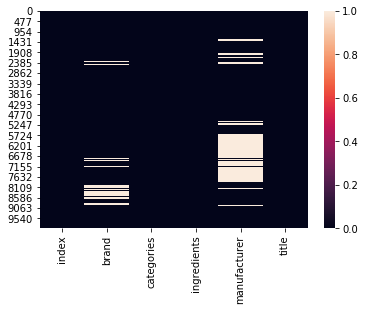

In [6]:
sns.heatmap(fooditems.isnull())

In [7]:
fooditems.fillna('Unknown', inplace = True)

In [8]:
#cosine similarity method

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
cv = CountVectorizer()

In [11]:
count_matrix = cv.fit_transform(fooditems['ingredients'])

In [12]:
count_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

In [14]:
sim_scores = cosine_similarity(count_matrix)
sim_scores

array([[1.        , 0.18898224, 0.        , ..., 0.        , 0.03798686,
        0.07049074],
       [0.18898224, 1.        , 0.20833333, ..., 0.20412415, 0.17588162,
        0.09325048],
       [0.        , 0.20833333, 1.        , ..., 0.13608276, 0.26801008,
        0.03108349],
       ...,
       [0.        , 0.20412415, 0.13608276, ..., 1.        , 0.14360674,
        0.13324272],
       [0.03798686, 0.17588162, 0.26801008, ..., 0.14360674, 1.        ,
        0.17806849],
       [0.07049074, 0.09325048, 0.03108349, ..., 0.13324272, 0.17806849,
        1.        ]])

In [41]:
fchoice_title = input('Enter the name of your food preferences: ')

Enter the name of your food preferences: Simon Fischer Fruit Bttr Prune Lekvar


In [42]:
def index_to_title(index):
    return fooditems[fooditems.index == index]['title'].values[0]
def title_to_index(title):
    try:
        return fooditems[fooditems.title == title]['index'].values[0]
    except:
        return 0

In [44]:
fchoice_index = title_to_index(fchoice_title)
fchoice_index

0

In [64]:
sim_food = list(enumerate(sim_scores[fchoice_index]))
#sim_food

In [65]:
sorted_sim_food = sorted(sim_food, key = lambda x:x[1], reverse = True)
#sorted_sim_food                 

In [56]:
for food in sorted_sim_food[:50]:
    print(index_to_title(food[0]))

Simon Fischer Fruit Bttr Prune Lekvar
Del Monte Sliced Peaches 15.25 oz
Del Monte Sliced Peaches, 20.0 OZ
Glory Foods Sweet Traditions Fresh Cut Sweet Potatoes In Light Syrup, 29 Oz
Bruce?s Yams, 29 Oz
Marshmallow Fluff - 16 oz plastic tub
Smuckers Strawberry Preserves
Trappist Preserve Jam Red Raspbry 12-ounce (pack of 6)
Jam Red Raspbry Sdls -pack of 6
Kikkoman Hon Tsuyu Soup Base for Noodle 17z x 2 bottles
DICKINSON PRESERVE STRWBRY, 10 OZ PACK OF 3
Goya Whole Kernel Golden Corn, 15.25 Oz
Fresh Cut Sweet Corn Cream Style, No Salt Added, 14.75 oz (418 g)
Hunt's Roasted Garlic _ Onion Pasta Sauce, 24 Oz.
Goya Tamarind Nectar, 9.6 Ounce -- 24 per case.
Delmonte Fruit Cocktail, 15.25 Oz
Kikkoman Manjo Aji Mirin Cooking Rice Wine, 60-Ounce
Kikkoman - Aji-Mirin (Sweet Cooking Rice Wine) 17 Oz.
Trappist Preserve Jelly Red Currant 12-ounce (pack of 6)
Hunt's Original Style Traditional Spaghetti Sauce 28 Oz
Reese Baby Corn, Pickled Whole
Yakisoba Source 1.8l Stalls
Joyva Sesame Crunch 8 oz
H

In [57]:
#verification

In [59]:
fooditems.iloc[title_to_index('Del Monte Sliced Peaches 15.25 oz')]['ingredients']

'Peaches,Water,High Fructose Corn Syrup,Corn Syrup,Sugar,Sugar.'

In [60]:
fooditems.iloc[title_to_index('Simon Fischer Fruit Bttr Prune Lekvar')]['ingredients'] #Top most

'Dried Prunes,Water,Corn Syrup,Sugar,Pectin.'

In [62]:
fooditems.iloc[title_to_index('Del Monte Sliced Peaches, 20.0 OZ')]['ingredients'] #Seocond in list

'Peaches,Water,High Fructose Corn Syrup,Corn Syrup,Sugar'

In [63]:
fooditems.iloc[title_to_index('The Great San Saba River Pecan Company Apple Pecan Spread')]['ingredients'] #50th in list

'Apples,Corn Syrup,Sugar,Pecans,Lemon Juice,Spices.'